In [26]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [9]:
gas = ct.Solution('data/chem.yaml')

CanteraError: 
*******************************************************************************
InputFileError thrown by AnyMap::operator[]:
Error on line 1 of ./data/chem.yaml:
Key 'species' not found.
Existing keys: generator, input-files, cantera-version, date, phases
|  Line |
>     1 > generator: ck2yaml
                    ^
|     2 | input-files: [chem.inp]
|     3 | cantera-version: 3.0.0
|     4 | date: Thu, 19 Oct 2023 23:29:57 +0530
*******************************************************************************


In [10]:
gas = ct.Solution('gri30.yaml')

In [12]:
gas()


  gri30:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.081894 kg/m^3
  mean mol. weight   2.016 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             26469             53361  J
   internal energy       -1.2108e+06        -2.441e+06  J
           entropy             64910        1.3086e+05  J/K
    Gibbs function       -1.9447e+07       -3.9204e+07  J
 heat capacity c_p             14311             28851  J/K
 heat capacity c_v             10187             20536  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2                 1                 1           -15.717
     [  +52 minor]                 0                 0  



In [13]:
phi_min = 0.2
phi_max = 3.6
n_pts = 35

In [14]:
T = 300.0
P = 101325.0

In [15]:
fuel_species = 'CH4'
ifuel = gas.species_index(fuel_species)
io2 = gas.species_index('O2')
in2 = gas.species_index('N2')

In [16]:
air_N2_O2_ratio = 3.76
stoich_O2 = gas.n_atoms(fuel_species, 'C') + 0.25 * gas.n_atoms(fuel_species, 'H')

In [19]:
phi = np.zeros(n_pts)
tad = np.zeros(n_pts)
xeq = np.zeros((gas.n_species, n_pts))

In [ ]:
for i in range(n_pts):
    phi[i] = phi_min + (phi_max - phi_min)*i/(n_pts - 1)
    X = np.zeros(gas.n_species)
    X[ifuel] = phi[i]
    X[io2] = stoich_O2
    X[in2] = stoich_O2*air_N2_O2_ratio

    gas.TPX = T, P, X

    gas.equilibrate('HP')

    tad[i] = gas.T
    xeq[:, i] = gas.X
    print("At phi = ", "%10.4f" % (phi[i]) + "  Tad = ", "%10.4f" % (tad[i]))

In [47]:
def func(fuel_species):
    
    ifuel = gas.species_index(fuel_species)
    io2 = gas.species_index('O2')
    in2 = gas.species_index('N2')

    air_N2_O2_ratio = 3.76
    stoich_O2 = gas.n_atoms(fuel_species, 'C') + 0.25 * gas.n_atoms(fuel_species, 'H')

    phi = np.zeros(n_pts)
    tad = np.zeros(n_pts)
    xeq = np.zeros((gas.n_species, n_pts))

    for i in range(n_pts):
        phi[i] = phi_min + (phi_max - phi_min)*i/(n_pts - 1)
        X = np.zeros(gas.n_species)
        X[ifuel] = phi[i]
        X[io2] = stoich_O2
        X[in2] = stoich_O2*air_N2_O2_ratio

        gas.TPX = T, P, X

        gas.equilibrate('HP')

        tad[i] = gas.T
        xeq[:, i] = gas.X
        print("At phi = ", "%10.4f" % (phi[i]) + "  Tad = ", "%10.4f" % (tad[i]))
    
    # for i, cas in enumerate(gas.species_names):
    #     if cas in ['O2', 'CO2', 'CO']:
    #         plt.plot(phi, xeq[i, :], label=cas)
    # plt.xlabel('Equivalence ratio')
    # plt.ylabel('Mass fractions')
    # plt.legend(loc='best')

    plt.plot(phi, tad)
    plt.xlabel('Equivalence ratio')
    plt.ylabel('Adiabatic flame temperature [K]')
    plt.show()
    

At phi =      0.2000  Tad =    894.7055
At phi =      0.3000  Tad =   1153.1271
At phi =      0.4000  Tad =   1392.5734
At phi =      0.5000  Tad =   1615.5131
At phi =      0.6000  Tad =   1822.8350
At phi =      0.7000  Tad =   2012.6661
At phi =      0.8000  Tad =   2177.5102
At phi =      0.9000  Tad =   2304.1948
At phi =      1.0000  Tad =   2381.5952
At phi =      1.1000  Tad =   2405.6442
At phi =      1.2000  Tad =   2383.4909
At phi =      1.3000  Tad =   2336.2339
At phi =      1.4000  Tad =   2280.6476
At phi =      1.5000  Tad =   2223.4465
At phi =      1.6000  Tad =   2166.7801
At phi =      1.7000  Tad =   2111.2977
At phi =      1.8000  Tad =   2057.1655
At phi =      1.9000  Tad =   2004.3934
At phi =      2.0000  Tad =   1952.9427
At phi =      2.1000  Tad =   1902.7626
At phi =      2.2000  Tad =   1853.8010
At phi =      2.3000  Tad =   1806.0073
At phi =      2.4000  Tad =   1759.3321
At phi =      2.5000  Tad =   1713.7268
At phi =      2.6000  Tad =   1669.1432


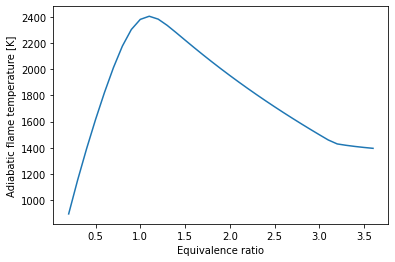

In [49]:
func('C3H7')